In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Letter Recognition dataset into a data frame
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data'
columns = ['letter', 'x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar',
           'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
df = pd.read_csv(url, names=columns)

# Display the class variables
print("Class Variables:")
print(df['letter'].value_counts())

# Convert the class variable to numerical values
df['letter'] = df['letter'].astype('category').cat.codes

# Drop the class variable from the data frame and save it in a different variable
X = df.drop('letter', axis=1)
y = df['letter']

# Visualize the first five entries of the modified data frame
print(X.head())

# Obtain the statistics of the 16 attributes using the describe function
print(X.describe())

# Perform feature scaling if necessary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(pd.DataFrame(X_scaled, columns=X.columns).describe())

# Split the dataset into a training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=43)

# Instantiate a “default” KNN model
knn_default = KNeighborsClassifier()

# Observe the parameters of the “default” KNN model
print(knn_default.get_params())

Class Variables:
letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64
   x-box  y-box  width  height  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0      2      8      3       5      1      8     13      0      6      6   
1      5     12      3       7      2     10      5      5      4     13   
2      4     11      6       8      6     10      6      2      6     10   
3      7     11      6       6      3      5      9      4      6      4   
4      2      1      3       1      1      8      6      6      6      6   

   x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0     10      8      0      8      0      8  
1      3      9      2      8      4     10  
2      3      7      3      7      3      9  
3      4     10      6     10      2      8  
4      5      9      1      7

In [ ]:
# Train the “default” model using the training data
knn_default.fit(X_train, y_train)



KNeighborsClassifier()

In [ ]:
# Calculate the predictions on the testing data
y_pred_default = knn_default.predict(X_test)



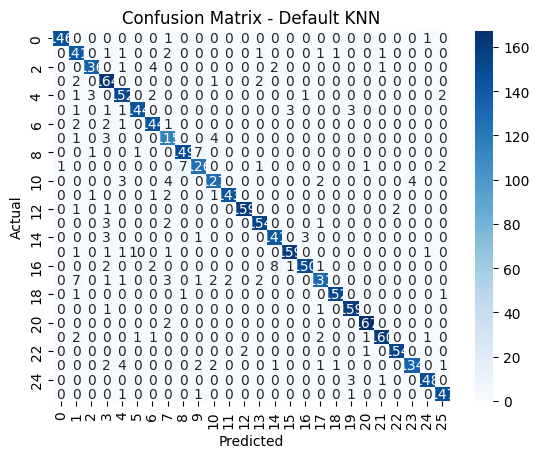

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.88      0.95      0.91       149
           2       0.96      0.94      0.95       144
           3       0.89      0.97      0.93       169
           4       0.92      0.94      0.93       161
           5       0.92      0.94      0.93       153
           6       0.94      0.96      0.95       150
           7       0.86      0.93      0.90       123
           8       0.95      0.94      0.95       158
           9       0.91      0.91      0.91       138
          10       0.93      0.91      0.92       140
          11       0.99      0.97      0.98       148
          12       0.99      0.98      0.98       163
          13       0.96      0.96      0.96       160
          14       0.93      0.95      0.94       148
          15       0.98      0.91      0.94       174
          16       0.97      0.91      0.94       164
          17       0.94    

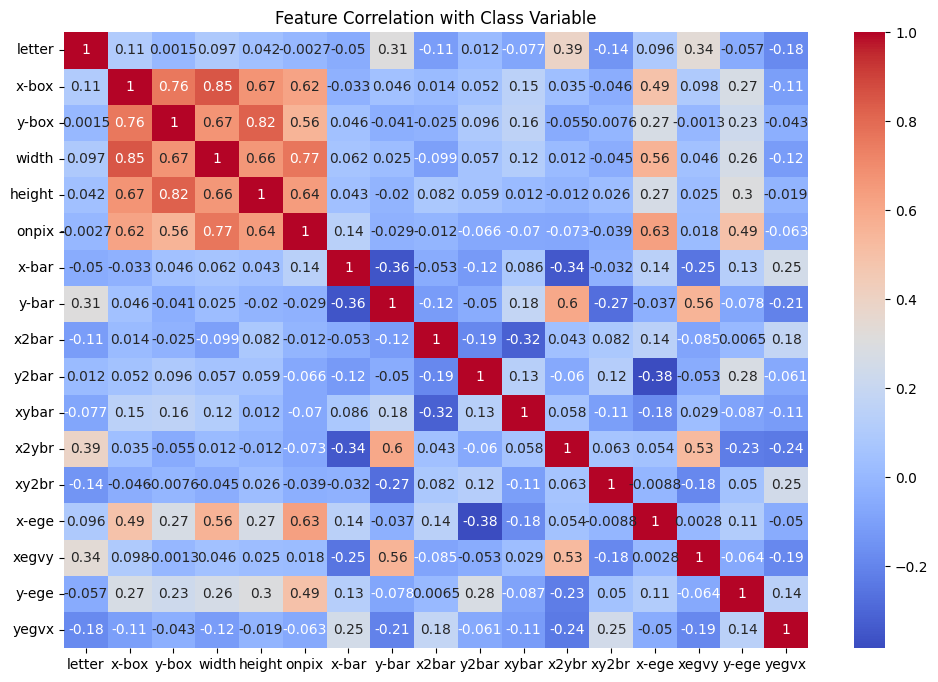

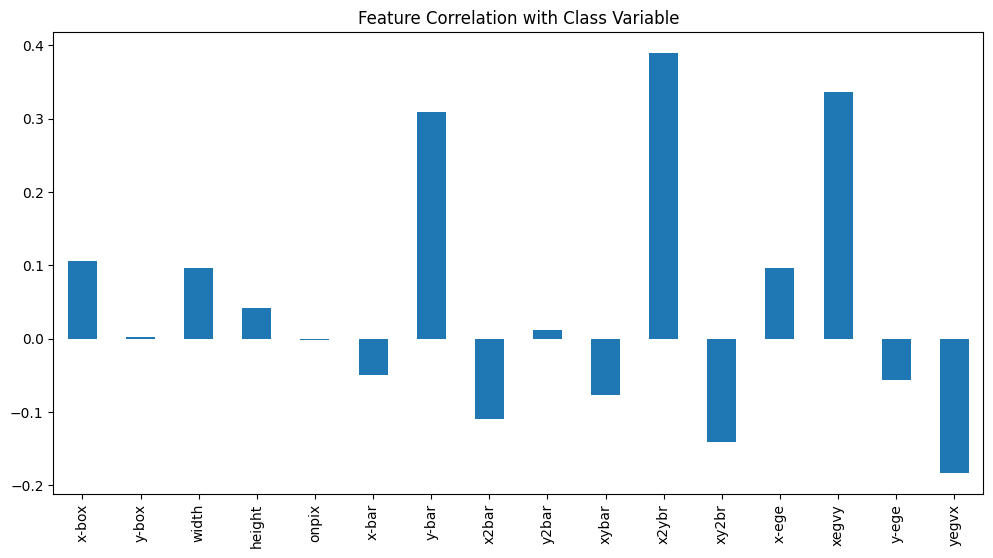

In [ ]:
# Obtain and visualize the confusion matrix
conf_matrix_default = confusion_matrix(y_test, y_pred_default)
sns.heatmap(conf_matrix_default, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Default KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred_default))

# Visualize correlation (Pearson) between features and the class variable
correlation = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Class Variable')
plt.show()

# Plot the correlation values of the 16 features versus the class variable on a bar plot
correlation_with_class = correlation['letter'].drop('letter')
correlation_with_class.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Correlation with Class Variable')
plt.show()



In [ ]:
# Instantiate a “weighted” KNN model
weights = np.random.random(16)  # Generate random weights for the features
knn_weighted = KNeighborsClassifier(metric='wminkowski', metric_params={'w': weights})


In [ ]:

# Observe the parameters of the “weighted” KNN model
print(knn_weighted.get_params())

# Train the “weighted” model using the training data
knn_weighted.fit(X_train, y_train)

# Calculate the predictions on the testing data
y_pred_weighted = knn_weighted.predict(X_test)




{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'wminkowski', 'metric_params': {'w': array([0.37243705, 0.91971609, 0.33148263, 0.41654059, 0.47681613,
       0.3908045 , 0.87083464, 0.22975121, 0.50972397, 0.99795954,
       0.38041733, 0.56137087, 0.2907415 , 0.18608122, 0.98678029,
       0.05590178])}, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_pairwise_distances_reduction/_dispatcher.py:277: FutureWarning: WMinkowskiDistance is deprecated in version 1.1 and will be removed in version 1.3. Use MinkowskiDistance instead. Note that in MinkowskiDistance, the weights are applied to the absolute differences raised to the p power. This is different from WMinkowskiDistance where weights are applied to the absolute differences before raising to the p power. The deprecation aims to remain consistent with SciPy 1.8 convention.
  return ArgKmin64.compute(


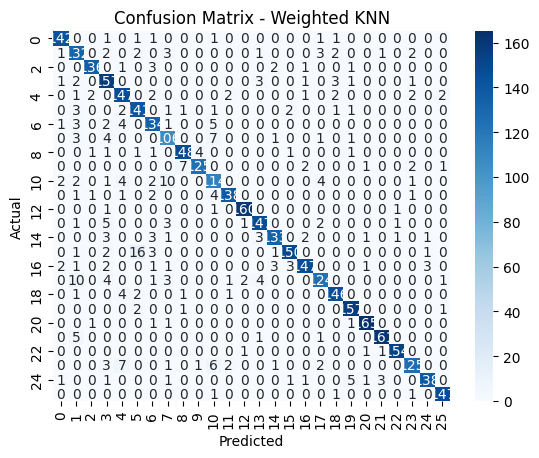

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       148
           1       0.80      0.89      0.84       149
           2       0.96      0.94      0.95       144
           3       0.83      0.93      0.88       169
           4       0.86      0.91      0.89       161
           5       0.85      0.92      0.89       153
           6       0.87      0.89      0.88       150
           7       0.80      0.86      0.83       123
           8       0.94      0.94      0.94       158
           9       0.96      0.91      0.93       138
          10       0.81      0.81      0.81       140
          11       0.96      0.93      0.95       148
          12       0.98      0.98      0.98       163
          13       0.92      0.92      0.92       160
          14       0.94      0.90      0.92       148
          15       0.96      0.86      0.91       174
          16       0.95      0.90      0.92       164
          17       0.90    

In [ ]:
# Obtain and visualize the confusion matrix
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
sns.heatmap(conf_matrix_weighted, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Weighted KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred_weighted))

# Compare the results of the default and weighted models
print("Default KNN Accuracy: ", accuracy_score(y_test, y_pred_default))
print("Weighted KNN Accuracy: ", accuracy_score(y_test, y_pred_weighted))



In [ ]:
# Modify weights for the top 5 features that are positively correlated with the class variable
top_5_features = correlation_with_class.abs().sort_values(ascending=False).head(5).index
top_5_weights = {feature: np.random.randint(1, 5) for feature in top_5_features}



In [ ]:
# Modify the weights for the top 5 features
weights = np.array([top_5_weights.get(feature, 1) for feature in df.columns[:-1]])
knn_weighted = KNeighborsClassifier(metric='wminkowski', metric_params={'w': weights})



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_pairwise_distances_reduction/_dispatcher.py:277: FutureWarning: WMinkowskiDistance is deprecated in version 1.1 and will be removed in version 1.3. Use MinkowskiDistance instead. Note that in MinkowskiDistance, the weights are applied to the absolute differences raised to the p power. This is different from WMinkowskiDistance where weights are applied to the absolute differences before raising to the p power. The deprecation aims to remain consistent with SciPy 1.8 convention.
  return ArgKmin64.compute(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_pairwise_distances_reduction/_dispatcher.py:277: FutureWarning: WMinkowskiDistance is deprecated in version 1.1 and will be removed in version 1.3. Use MinkowskiDistance instead. Note that in MinkowskiDistance, the weights are applied to the absolute differences raised to the p power. This is different from WMinkowskiDistance where weights are applied to the absolute differ

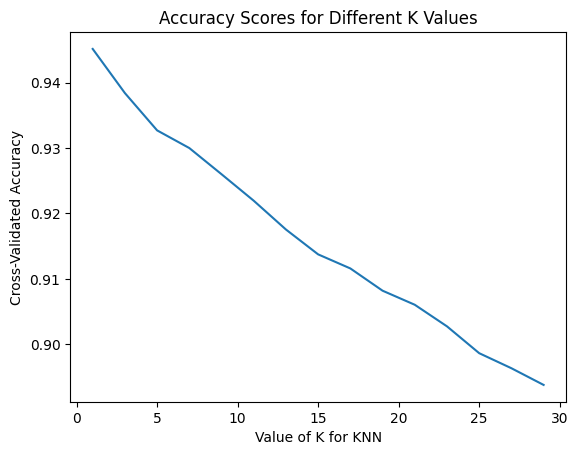

Optimal K: 1


In [ ]:
# Perform a K-fold cross-validation and find the optimum value of K
k_range = range(1, 31, 2)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='wminkowski', metric_params={'w': weights})
    scores = cross_val_score(knn, X_scaled, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy Scores for Different K Values')
plt.show()

# Optimal K value
optimal_k = k_range[np.argmax(k_scores)]
print(f'Optimal K: {optimal_k}')




In [ ]:
# Instantiate an “optimum” KNN model
knn_optimum = KNeighborsClassifier(n_neighbors=optimal_k, metric='wminkowski', metric_params={'w': weights})

# Train the “optimum” model using the training data
knn_optimum.fit(X_train, y_train)

# Calculate the predictions on the testing data
y_pred_optimum = knn_optimum.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_pairwise_distances_reduction/_dispatcher.py:277: FutureWarning: WMinkowskiDistance is deprecated in version 1.1 and will be removed in version 1.3. Use MinkowskiDistance instead. Note that in MinkowskiDistance, the weights are applied to the absolute differences raised to the p power. This is different from WMinkowskiDistance where weights are applied to the absolute differences before raising to the p power. The deprecation aims to remain consistent with SciPy 1.8 convention.
  return ArgKmin64.compute(


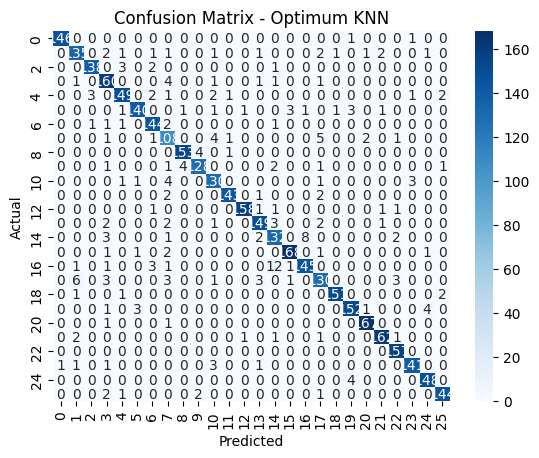

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.92      0.91      0.91       149
           2       0.97      0.96      0.97       144
           3       0.89      0.95      0.92       169
           4       0.94      0.93      0.93       161
           5       0.97      0.92      0.94       153
           6       0.94      0.96      0.95       150
           7       0.81      0.88      0.84       123
           8       0.97      0.97      0.97       158
           9       0.96      0.93      0.94       138
          10       0.90      0.93      0.92       140
          11       0.98      0.97      0.97       148
          12       0.99      0.97      0.98       163
          13       0.94      0.93      0.93       160
          14       0.86      0.89      0.87       148
          15       0.97      0.97      0.97       174
          16       0.94      0.88      0.91       164
          17       0.88    

In [ ]:
# Obtain and visualize the confusion matrix
conf_matrix_optimum = confusion_matrix(y_test, y_pred_optimum)
sns.heatmap(conf_matrix_optimum, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Optimum KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred_optimum))

# Compare the results with the previous models
print("Optimum KNN Accuracy: ", accuracy_score(y_test, y_pred_optimum))